# Analizing Stack Overflow 2023 developers Survey 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
survey = pd.read_csv('/kaggle/input/stack-overflow-2023-developers-survey/survey_results_public.csv')

In [3]:
survey.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


## 1. what is the precentage of Python users in each country?

In [4]:
filt = survey['LanguageHaveWorkedWith'].str.contains('Python', na=False)
python_precentage = survey[filt]

In [5]:
python_precentage = python_precentage.groupby('Country')

In [6]:
total_users_per_country = survey['Country'].value_counts()
python_precentage = (python_precentage.size() / total_users_per_country) * 100

In [7]:
python_precentage

Country
Afghanistan                             34.375000
Albania                                 31.666667
Algeria                                 41.176471
Andorra                                 31.250000
Angola                                  30.769231
                                          ...    
Venezuela, Bolivarian Republic of...    39.622642
Viet Nam                                44.615385
Yemen                                   40.000000
Zambia                                  42.307692
Zimbabwe                                55.882353
Length: 185, dtype: float64

In [8]:
# Convert the result to a DataFrame for easier plotting
result_df = python_precentage.reset_index()
result_df.columns = ['Country', 'Percentage']

# Sort the DataFrame by percentage in descending order for better visualization
result_df = result_df.sort_values(by='Percentage', ascending=False)

/tmp/ipykernel_19/1517275333.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


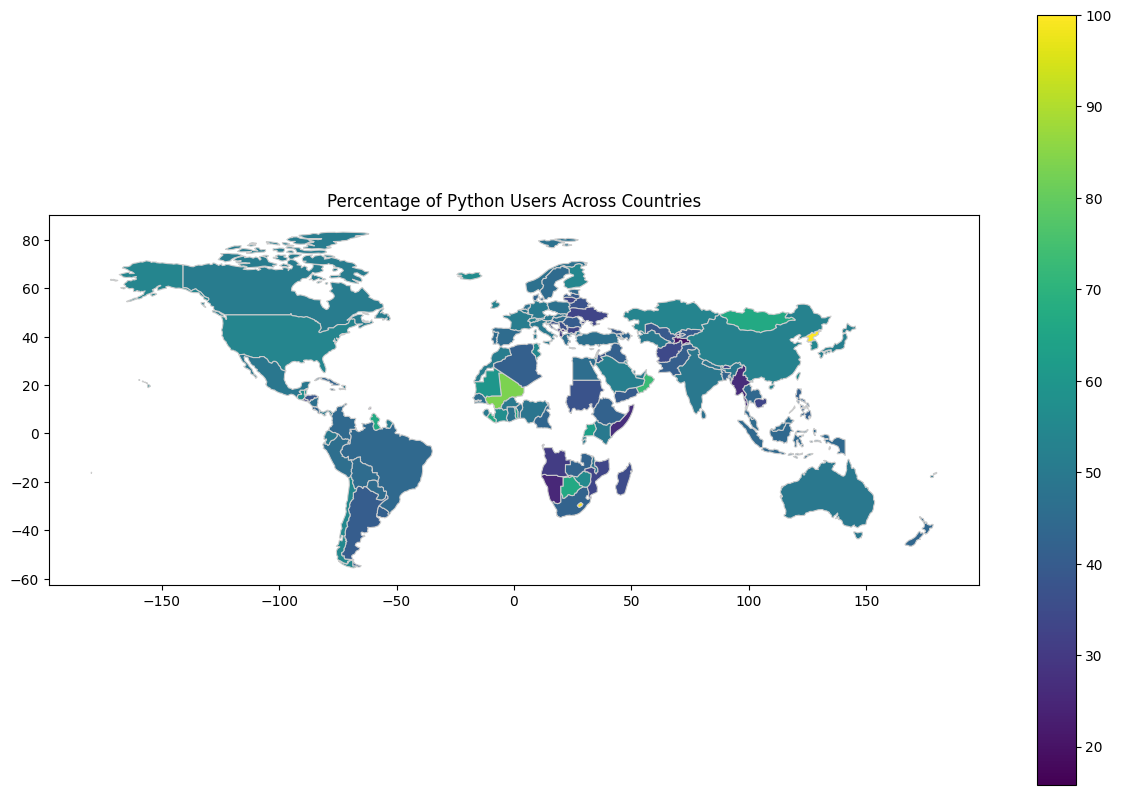

In [9]:
import geopandas as gpd

# Assuming 'world' is a GeoDataFrame containing world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map with percentage data
merged_data = world.merge(result_df, left_on='name', right_on='Country')

# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Percentage', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Percentage of Python Users Across Countries')
plt.show()

some countries appear in white because no responses came from them or because their name in the **result_df** is different from their name in the **world GeoDataFrame**

In [10]:
survey.Country.unique()

array([nan, 'United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland', 'Finland',
       'India', 'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Belgium', 'Italy',
       'Brazil', 'Portugal', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Poland', 'Lebanon', 'Lithuania',
       'Serbia', 'Cyprus', 'China', 'Bahrain',
       'Iran, Islamic Republic of...', 'Pakistan', 'Egypt',
       'Russian Federation', 'Turkey', 'Slovakia', 'Latvia', 'Greece',
       'Austria', 'Denmark', 'Israel', 'Norway', 'Hungary', 'Singapore',
       'United Arab Emirates', 'Croatia', 'Czech Republic', 'Kosovo',
       'Nepal', 'Slovenia', 'Romania', 'Luxembourg', 'Indonesia',
       'Tunisia', 'Republic of Korea', 'Viet Nam', 'Ukraine', 'Kenya',
       'Nomadic', 'Dominican Republic', 'Morocco', 'Uzbekistan',
       'Belarus', 'Isle of Man', 'Estonia', 'Bulgaria',
       '

In [11]:
world['name'].tail(10)

167             Somaliland
168                 Uganda
169                 Rwanda
170       Bosnia and Herz.
171        North Macedonia
172                 Serbia
173             Montenegro
174                 Kosovo
175    Trinidad and Tobago
176               S. Sudan
Name: name, dtype: object

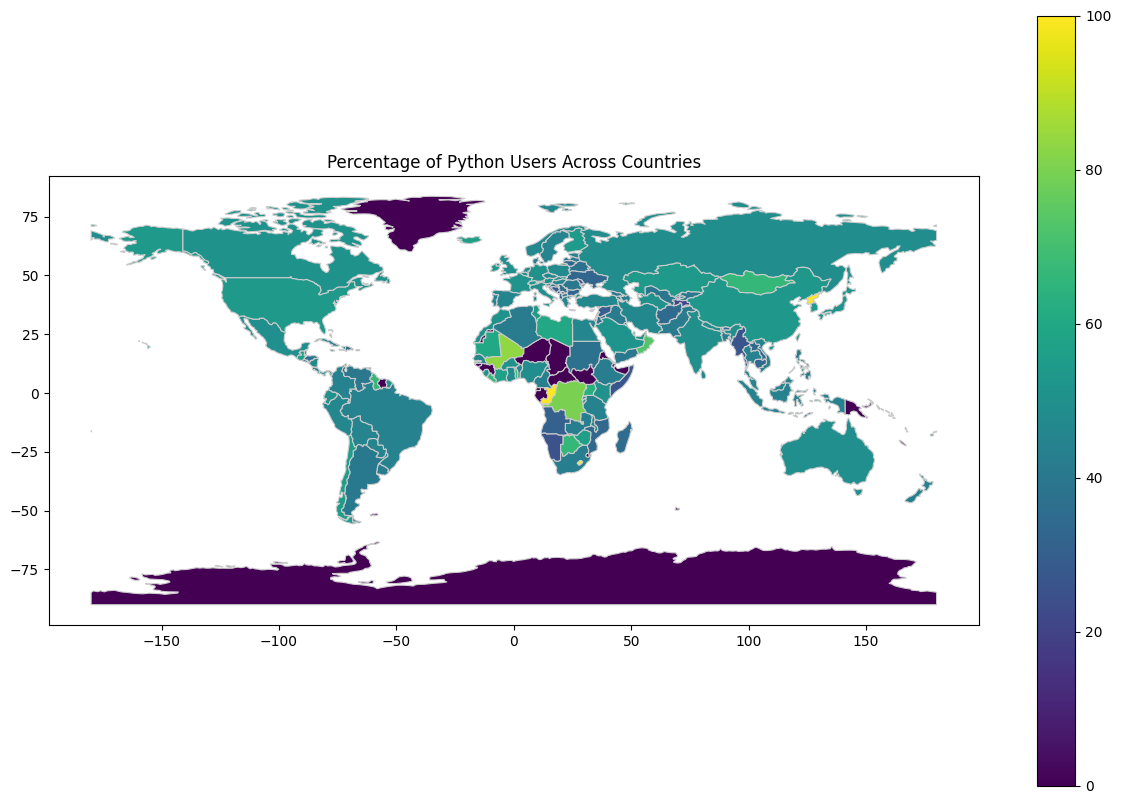

In [12]:
# Create a mapping between country names in result_df and world
name_mapping = {
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Iran, Islamic Republic of...': 'Iran',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    'Syrian Arab Republic': 'Syria',
    "Lao People's Democratic Republic": 'Laos',
    "Republic of Moldova": 'Moldova',
    "Democratic Republic of the Congo": 'Dem. Rep. Congo',
    "Timor-Leste": 'East Timor',
    # Add more mappings as needed
    'Libyan Arab Jamahiriya' : 'Libya',
    'Russian Federation': 'Russia',
    'Viet Nam': 'Vietnam',
    'Czech Republic': 'Czechia',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Dominican Republic': 'Dominican Rep.',
    'The former Yugoslav Republic of Macedonia': 'North Macedonia',
    'Central African Republic': 'Central African Rep.',
    'United Republic of Tanzania': 'Tanzania',
    'Congo, Republic of the...': 'Congo',
}

# Replace country names in result_df using the mapping
result_df['Country'] = result_df['Country'].replace(name_mapping)

# Merge world map with percentage data
merged_data = world.merge(result_df, left_on='name', right_on='Country', how='left')

merged_data['Percentage'] = merged_data['Percentage'].fillna(0)

# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Percentage', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Percentage of Python Users Across Countries')
plt.show()

## 2. What is the average coding of experience in each continent

In [13]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In order to get benifit from continent column in **world DF**, I will rename countries in **survey DF** instead of mapping them in another one.

In [14]:
survey['Country'] = survey['Country'].replace(name_mapping)

In [15]:
# Assuming survey and world are your DataFrames

# Merge the survey DataFrame with the world DataFrame based on the 'country' column
merged_df = survey.merge(world[['name', 'continent']], left_on='Country', right_on='name', how='left')

# Drop the redundant 'name' column from the merged DataFrame
merged_df = merged_df.drop('name', axis=1)

# Rename the 'continent' column to 'country_continent' to avoid conflicts with existing columns
merged_df = merged_df.rename(columns={'continent': 'country_continent'})

In [16]:
merged_df[['Country', 'country_continent']]

,Country,country_continent
0,NaN,NaN
1,United States of America,North America
2,United States of America,North America
3,United States of America,North America
4,Philippines,Asia
...,...,...
89179,Brazil,South America
89180,Romania,Europe
89181,Israel,Asia
89182,Switzerland,Europe


In [17]:
merged_df['country_continent'].isna().sum()

2045

In [18]:
merged_df['Country'].isna().sum()

1211

In [19]:
schema = pd.read_csv('/kaggle/input/stack-overflow-2023-developers-survey/survey_results_schema.csv')

In [20]:
merged_df[['YearsCodePro', 'country_continent']]

,YearsCodePro,country_continent
0,NaN,NaN
1,9,North America
2,23,North America
3,7,North America
4,4,Asia
...,...,...
89179,5,South America
89180,NaN,Europe
89181,NaN,Asia
89182,NaN,Europe


In [21]:
merged_df['YearsCodePro'].unique()

array([nan, '9', '23', '7', '4', '21', '3', '15', 'Less than 1 year',
       '10', '2', '6', '14', '5', '19', '13', '16', '28', '1', '30', '11',
       '8', '25', '32', '24', '40', '17', '45', '29', '12', '31', '20',
       '18', '50', '27', '43', '22', '26', '38', '33', '44', '35', '34',
       '37', '42', '41', 'More than 50 years', '47', '36', '39', '48',
       '46', '49'], dtype=object)

In [22]:
special_cases = {
    'Less than 1 year': 0,
    'More than 50 years': 51
}

# Convert the 'YearsCodePro' column to numeric, handling special cases
merged_df['YearsCodePro'] = pd.to_numeric(merged_df['YearsCodePro'].replace(special_cases), errors='coerce')

In [23]:
merged_df['YearsCodePro'].unique()

array([nan,  9., 23.,  7.,  4., 21.,  3., 15.,  0., 10.,  2.,  6., 14.,
        5., 19., 13., 16., 28.,  1., 30., 11.,  8., 25., 32., 24., 40.,
       17., 45., 29., 12., 31., 20., 18., 50., 27., 43., 22., 26., 38.,
       33., 44., 35., 34., 37., 42., 41., 51., 47., 36., 39., 48., 46.,
       49.])

In [24]:
continent_stats = merged_df.groupby('country_continent')['YearsCodePro'].agg(['mean', 'median'])

In [25]:
continent_stats

,mean,median
country_continent,,
Africa,7.669118,5.0
Asia,7.286608,5.0
Europe,11.414647,9.0
North America,13.071479,10.0
Oceania,14.464286,12.0
South America,10.194598,8.0


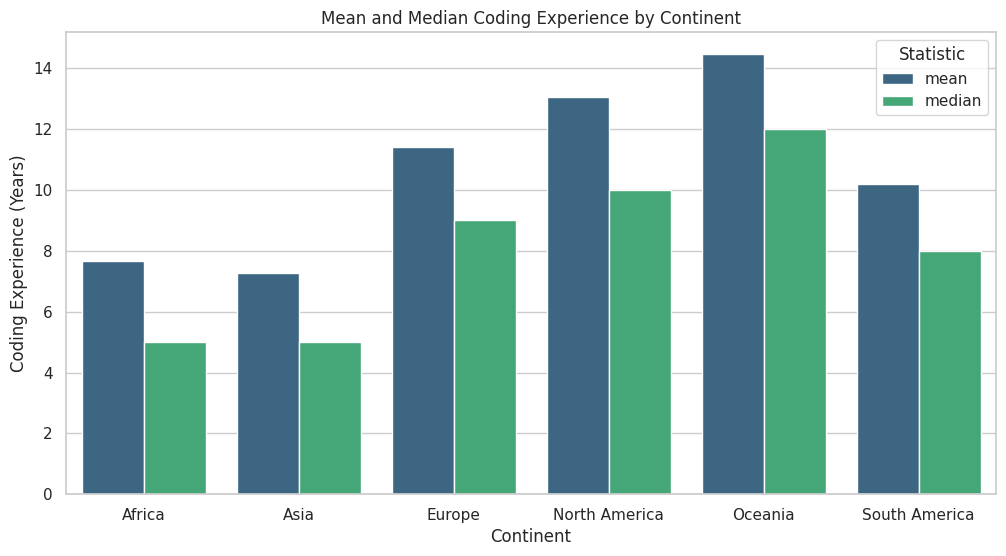

In [26]:
# Reset the index to make 'country_continent' a regular column
continent_stats = continent_stats.reset_index()
# Melt the DataFrame to make it suitable for seaborn
melted_df = pd.melt(continent_stats, id_vars='country_continent', var_name='Statistic', value_name='Coding Experience')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for mean and median coding experience
plt.figure(figsize=(12, 6))
sns.barplot(x='country_continent', y='Coding Experience', hue='Statistic', data=melted_df, palette='viridis')
plt.title('Mean and Median Coding Experience by Continent')
plt.xlabel('Continent')
plt.ylabel('Coding Experience (Years)')
plt.legend(title='Statistic', loc='upper right')
plt.show()

## 3. Most popular programming laguage

In [27]:
survey['LanguageHaveWorkedWith']

0                                                      NaN
1                               HTML/CSS;JavaScript;Python
2                               Bash/Shell (all shells);Go
3        Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4                           HTML/CSS;JavaScript;TypeScript
                               ...                        
89179              HTML/CSS;Java;JavaScript;SQL;TypeScript
89180                                 Dart;Java;Python;SQL
89181    Assembly;Bash/Shell (all shells);C;C#;Python;R...
89182    Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...
89183                      C#;Go;JavaScript;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 89184, dtype: object

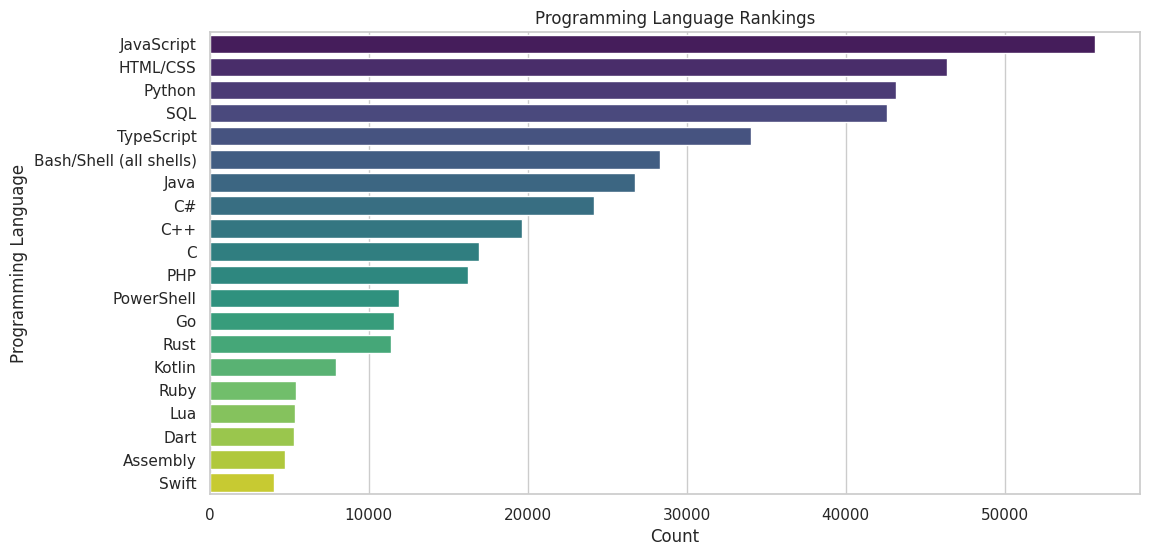

In [28]:
# Split values in 'LanguageHaveWorkedWith' column and stack the results
languages_stacked = survey['LanguageHaveWorkedWith'].str.split(';', expand=True).stack()

# Count the occurrences of each programming language
language_counts = languages_stacked.value_counts()

# Filter languages with counts less than 10000
language_counts = language_counts[language_counts >= 4000]

# Create a DataFrame from the counts
language_counts_df = pd.DataFrame({'Language': language_counts.index, 'Count': language_counts.values})

# Sort the DataFrame by counts in descending order
language_counts_df = language_counts_df.sort_values(by='Count', ascending=False)

# Plot the results using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Language', data=language_counts_df, palette='viridis')
plt.title('Programming Language Rankings')
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.show()

In [29]:
languages_stacked

1      0                   HTML/CSS
       1                 JavaScript
       2                     Python
2      0    Bash/Shell (all shells)
       1                         Go
                     ...           
89183  0                         C#
       1                         Go
       2                 JavaScript
       3                        SQL
       4                 TypeScript
Length: 466157, dtype: object

## 4. learning to code(LearnCode) vs resorcecs(LearnCodeOnline) vs DevType(select Data Scientist) vs salary(CompTotal)

In [30]:
survey['LearnCode']

0                                                      NaN
1        Books / Physical media;Colleague;Friend or fam...
2        Books / Physical media;Colleague;On the job tr...
3        Colleague;Friend or family member;Other online...
4        Books / Physical media;Online Courses or Certi...
                               ...                        
89179    Online Courses or Certification;Other online r...
89180    Colleague;Online Courses or Certification;Othe...
89181    Books / Physical media;Hackathons (virtual or ...
89182    Online Courses or Certification;Other online r...
89183    Colleague;Online Courses or Certification;Othe...
Name: LearnCode, Length: 89184, dtype: object

In [31]:
# Split values in 'LanguageHaveWorkedWith' column and stack the results
learn_stacked = survey['LearnCode'].str.split(';', expand=True).stack()

# Count the occurrences of each programming language
learn_counts = learn_stacked.value_counts()

# Filter languages with counts less than 10000
# learn_counts = learn_counts[learn_counts >= 4000]

# Create a DataFrame from the counts
learn_counts_df = pd.DataFrame({'Language': learn_counts.index, 'Count': learn_counts.values})


In [32]:
learn_counts_df

,Language,Count
0,"Other online resources (e.g., videos, blogs, f...",70244
1,Books / Physical media,45406
2,"School (i.e., University, College, etc)",43957
3,Online Courses or Certification,43201
4,On the job training,40380
5,Colleague,20523
6,Friend or family member,9936
7,Coding Bootcamp,8602
8,Hackathons (virtual or in-person),7033
9,Other (please specify):,5451


In [33]:
DataSciMentality = survey[['CompTotal', 'DevType', 'LearnCode', 'LearnCodeOnline']]
DataSciMentality = DataSciMentality.loc[survey['DevType'] == 'Data scientist or machine learning specialist']


In [34]:
DataSciMentality = DataSciMentality.dropna(subset=['CompTotal'])
DataSciMentality = DataSciMentality.reset_index(drop=True)

In [35]:
DataSciMentality

,CompTotal,DevType,LearnCode,LearnCodeOnline
0,80000.0,Data scientist or machine learning specialist,Colleague;Hackathons (virtual or in-person);On...,Formal documentation provided by the owner of ...
1,70000.0,Data scientist or machine learning specialist,Friend or family member;Online Courses or Cert...,Formal documentation provided by the owner of ...
2,70000.0,Data scientist or machine learning specialist,Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...
3,2000000.0,Data scientist or machine learning specialist,Books / Physical media;Online Courses or Certi...,NaN
4,167000.0,Data scientist or machine learning specialist,Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...
...,...,...,...,...
989,196000.0,Data scientist or machine learning specialist,On the job training;Other online resources (e....,Formal documentation provided by the owner of ...
990,600000.0,Data scientist or machine learning specialist,Friend or family member;Online Courses or Cert...,Formal documentation provided by the owner of ...
991,83500.0,Data scientist or machine learning specialist,Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...
992,20000.0,Data scientist or machine learning specialist,Books / Physical media;Colleague;Online Course...,NaN


In [36]:
options = [
    'Books / Physical media',
    'Coding Bootcamp',
    'Colleague',
    'Friend or family member',
    'Hackathons (virtual or in-person)',
    'Online Courses or Certification',
    'On the job training',
    'Other online resources (e.g., videos, blogs, forum)',
    'School (i.e., University, College, etc)'
]

# Create new columns for each option
for option in options:
    DataSciMentality[option] = DataSciMentality['LearnCode'].str.contains(option)

/tmp/ipykernel_19/3247222771.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  DataSciMentality[option] = DataSciMentality['LearnCode'].str.contains(option)
/tmp/ipykernel_19/3247222771.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  DataSciMentality[option] = DataSciMentality['LearnCode'].str.contains(option)
/tmp/ipykernel_19/3247222771.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  DataSciMentality[option] = DataSciMentality['LearnCode'].str.contains(option)


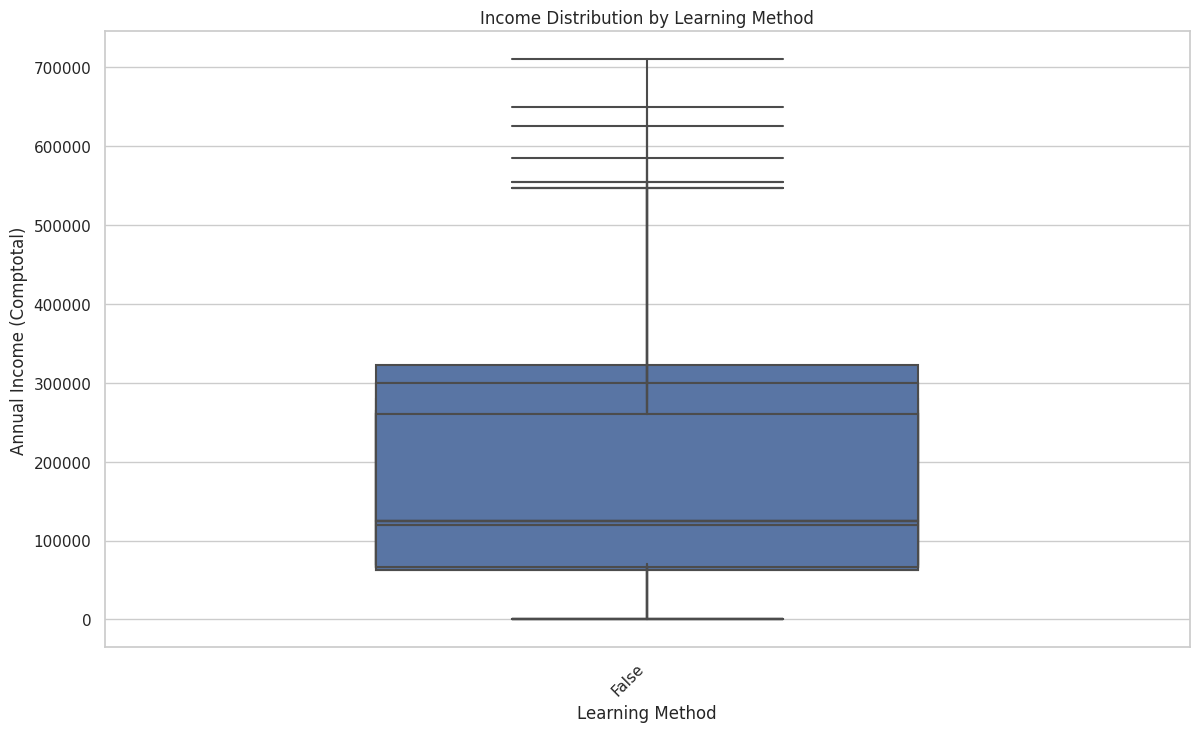

In [37]:
plt.figure(figsize=(14, 8))

for option in options:
    sns.boxplot(x=option, y='CompTotal', data=DataSciMentality, showfliers=False, width=0.5)

plt.xticks(rotation=45, ha='right')
plt.title('Income Distribution by Learning Method')
plt.xlabel('Learning Method')
plt.ylabel('Annual Income (Comptotal)')
plt.show()

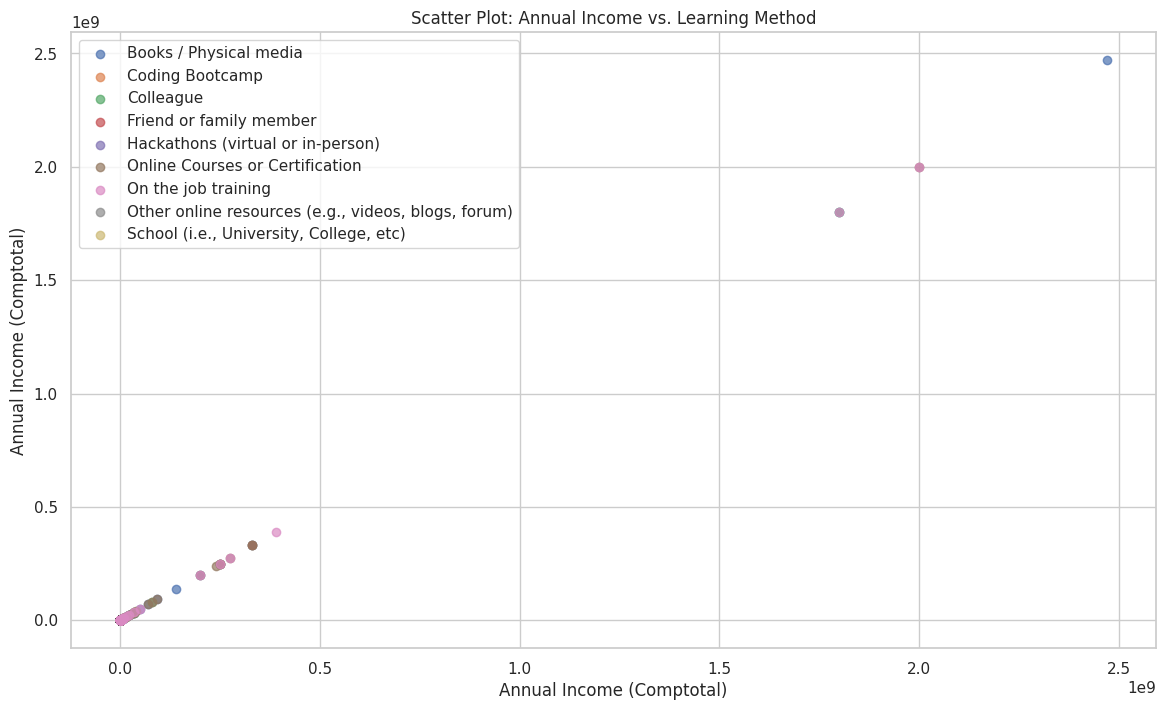

In [38]:
# Set up a scatter plot for each learning method
plt.figure(figsize=(14, 8))

for i, option in enumerate(options):
    plt.scatter(
        x=DataSciMentality[DataSciMentality[option] == 1]['CompTotal'],
        y=DataSciMentality[DataSciMentality[option] == 1]['CompTotal'],
        label=option,
        alpha=0.7
    )

plt.title('Scatter Plot: Annual Income vs. Learning Method')
plt.xlabel('Annual Income (Comptotal)')
plt.ylabel('Annual Income (Comptotal)')
plt.legend()
plt.show()
